In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [2]:
col_names = ['time','sw_up','sw_down','lw_up','lw_down','body_temp_C','body_temp_K','tc_lw_up','tc_lw_down','net','sky_temp','g_temp']

In [3]:
cols_to_use = [0,2,3,4,5,6,7,8,9,10,11,12]

In [4]:
df = pd.read_csv("deere_CR3000_CNR1.csv",skiprows=4,usecols=cols_to_use,names=col_names,parse_dates=["time"])

In [5]:
df

,time,sw_up,sw_down,lw_up,lw_down,body_temp_C,body_temp_K,tc_lw_up,tc_lw_down,net,sky_temp,g_temp
0,2020-03-13 11:23:00,2.102,0.162,8.140,1.671,21.55,294.7,435.8,429.3,8.41,22.94,21.83
1,2020-03-13 11:23:10,2.102,0.129,8.120,1.639,21.56,294.7,435.8,429.3,8.45,22.95,21.84
2,2020-03-13 11:23:20,2.135,0.151,8.050,1.606,21.56,294.7,435.8,429.3,8.43,22.94,21.83
3,2020-03-13 11:23:30,2.124,0.140,8.100,1.639,21.56,294.7,435.8,429.4,8.44,22.95,21.84
4,2020-03-13 11:23:40,2.081,0.108,8.300,1.649,21.56,294.7,436.0,429.4,8.62,22.98,21.85
...,...,...,...,...,...,...,...,...,...,...,...,...
260,2020-03-13 12:07:50,1.013,11.240,4.614,60.660,22.52,295.7,437.9,494.0,-66.28,23.31,32.37
261,2020-03-13 12:08:00,1.046,11.110,4.258,58.210,22.53,295.7,437.7,491.6,-64.02,23.26,32.00
262,2020-03-13 12:08:10,0.938,10.640,4.269,56.610,22.54,295.7,437.7,490.0,-62.04,23.26,31.75
263,2020-03-13 12:08:20,0.809,10.370,4.140,55.220,22.55,295.7,437.7,488.7,-60.64,23.26,31.55


In [6]:
type(df["time"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
start_date=pd.Timestamp(2020,3,13,11,42,0)
end_date=pd.Timestamp(2020,3,13,11,56,30)
sun_start=pd.Timestamp(2020,3,13,11,43,0)
cloud_start=pd.Timestamp(2020,3,13,11,47,0)
snow_start=pd.Timestamp(2020,3,13,11,50,0)


In [8]:
start_date

Timestamp('2020-03-13 11:42:00')

In [9]:
mask= (df["time"] > start_date) & (df["time"] < end_date)
mask

0      False
1      False
2      False
3      False
4      False
       ...  
260    False
261    False
262    False
263    False
264    False
Name: time, Length: 265, dtype: bool

In [10]:
df_2= df[mask]

In [11]:
df_2

,time,sw_up,sw_down,lw_up,lw_down,body_temp_C,body_temp_K,tc_lw_up,tc_lw_down,net,sky_temp,g_temp
106,2020-03-13 11:42:10,2.480,0.485,8.830,3.180,21.75,294.9,437.6,432.0,7.644,23.25,22.29
107,2020-03-13 11:42:20,2.480,0.636,8.760,3.417,21.74,294.9,437.6,432.2,7.191,23.24,22.33
108,2020-03-13 11:42:30,2.717,0.809,8.870,3.320,21.75,294.9,437.7,432.2,7.460,23.27,22.32
109,2020-03-13 11:42:40,4.172,0.744,8.500,3.126,21.75,294.9,437.3,432.0,8.800,23.20,22.29
110,2020-03-13 11:42:50,3.364,0.679,8.880,2.911,21.76,294.9,437.7,431.8,8.660,23.27,22.26
...,...,...,...,...,...,...,...,...,...,...,...,...
187,2020-03-13 11:55:40,4.592,0.658,9.400,2.803,21.97,295.1,439.5,432.9,10.530,23.57,22.45
188,2020-03-13 11:55:50,3.018,0.334,8.450,3.256,21.97,295.1,438.6,433.4,7.880,23.41,22.53
189,2020-03-13 11:56:00,2.727,0.302,8.080,2.824,21.97,295.1,438.2,433.0,7.686,23.35,22.46
190,2020-03-13 11:56:10,2.458,0.194,9.400,4.301,21.97,295.1,439.5,434.4,7.363,23.57,22.71


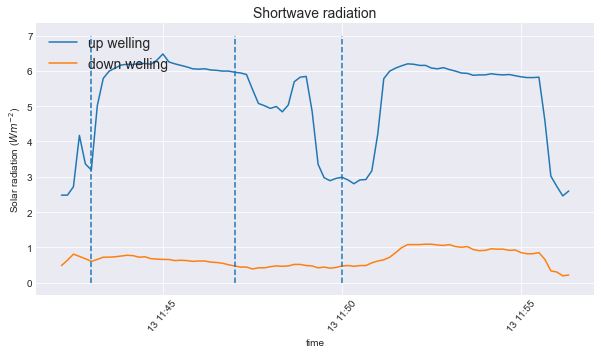

In [16]:
plt.figure(figsize=(10,5))
plt.plot(df_2["time"],df_2["sw_up"])
plt.plot(df_2["time"],df_2["sw_down"])
plt.legend(["up welling","down welling"],fontsize=14,loc="upper left")
plt.ylabel("Solar radiation ($W m^{-2}$)")
plt.xlabel("time")
plt.title("Shortwave radiation", fontsize=14)
plt.grid(True)
plt.xticks(rotation=50)
plt.vlines([sun_start,cloud_start,snow_start],0,7,linestyle="--")

sunlight starts at 11:43
cloud cover at 11:47
snow at 11:50

In [17]:
df_2["albedo"]=df_2["sw_down"]/df_2["sw_up"]

C:\Users\Ali\AppData\Local\Temp\ipykernel_26648\2642080552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["albedo"]=df_2["sw_down"]/df_2["sw_up"]


In [19]:
df_2.head()

,time,sw_up,sw_down,lw_up,lw_down,body_temp_C,body_temp_K,tc_lw_up,tc_lw_down,net,sky_temp,g_temp,albedo
106,2020-03-13 11:42:10,2.480,0.485,8.83,3.180,21.75,294.9,437.6,432.0,7.644,23.25,22.29,0.195565
107,2020-03-13 11:42:20,2.480,0.636,8.76,3.417,21.74,294.9,437.6,432.2,7.191,23.24,22.33,0.256452
108,2020-03-13 11:42:30,2.717,0.809,8.87,3.320,21.75,294.9,437.7,432.2,7.460,23.27,22.32,0.297755
109,2020-03-13 11:42:40,4.172,0.744,8.50,3.126,21.75,294.9,437.3,432.0,8.800,23.20,22.29,0.178332
110,2020-03-13 11:42:50,3.364,0.679,8.88,2.911,21.76,294.9,437.7,431.8,8.660,23.27,22.26,0.201843


Text(0.5, 1.0, 'Albedo')

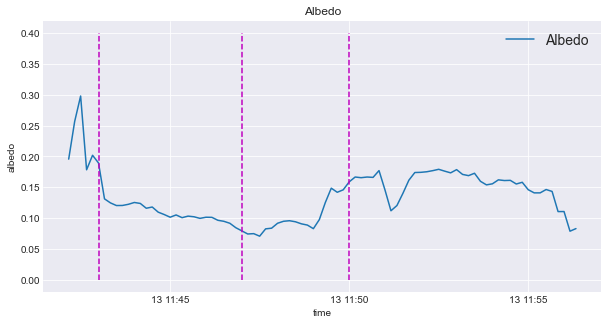

In [32]:
plt.figure(figsize=(10,5))
plt.plot(df_2["time"],df_2["albedo"],label="Albedo")
plt.legend(fontsize=14)
plt.xlabel("time")
plt.ylabel("albedo")
plt.vlines([sun_start,cloud_start,snow_start],0,0.40,linestyle="--",color="m")
plt.title("Albedo")

In [37]:
col_names = ['time','body_temp_C','therm_temp','targ_temp']
cols_to_use = [0,2,3,4]

In [41]:
df_3 = pd.read_csv("deere_CR3000_IRR-P.csv",skiprows=4,usecols=cols_to_use,names=col_names,parse_dates=["time"])

In [42]:
df_3

,time,body_temp_C,therm_temp,targ_temp
0,2020-03-13 11:23:00,22.33,-0.011,22.00
1,2020-03-13 11:23:10,22.33,-0.011,22.00
2,2020-03-13 11:23:20,22.32,-0.010,22.01
3,2020-03-13 11:23:30,22.32,-0.010,22.01
4,2020-03-13 11:23:40,22.32,-0.010,22.00
...,...,...,...,...
260,2020-03-13 12:07:50,24.26,0.034,24.74
261,2020-03-13 12:08:00,24.26,0.031,24.69
262,2020-03-13 12:08:10,24.26,0.030,24.66
263,2020-03-13 12:08:20,24.25,0.029,24.64


In [43]:
start_time = pd.Timestamp(2020,3,13,12,0,0)
end_time = pd.Timestamp(2020,3,13,12,9,30)

In [44]:
mask = (df_3["time"]> start_time) & (df_3["time"] < end_time) 

In [45]:
df_3 = df_3[mask]

In [46]:
df_3

,time,body_temp_C,therm_temp,targ_temp
214,2020-03-13 12:00:10,22.77,0.016,22.91
215,2020-03-13 12:00:20,22.78,0.025,23.08
216,2020-03-13 12:00:30,22.80,0.021,23.04
217,2020-03-13 12:00:40,22.83,0.020,23.04
218,2020-03-13 12:00:50,22.87,-0.019,22.40
219,2020-03-13 12:01:00,22.90,-0.027,22.29
220,2020-03-13 12:01:10,22.91,-0.031,22.23
221,2020-03-13 12:01:20,22.91,-0.032,22.23
222,2020-03-13 12:01:30,22.91,-0.030,22.25
223,2020-03-13 12:01:40,22.91,0.779,35.37
